In [1]:
import pyaudio
import wave

In [2]:
CHUNK = 1024 # 设定缓存区帧数为 1024 
FORMAT = pyaudio.paInt16 # 设定数据流采样深度为 16 位
CHANNELS = 1 # 设置声卡通道为 1
RATE = 16000 # 设置采样率
RECORD_SECONDS = 4 # 设置记录秒数

In [3]:
frames = [] # 创建一个新列表，用于存储采集到的的数据\
pa = pyaudio.PyAudio() # 实例化一个 Pyaudio 对象
def record(Rate,filename):    
    frames.clear()
    stream = pa.open( format=FORMAT, channels=CHANNELS, rate=Rate, input=True, 
    frames_per_buffer=CHUNK) 
    print("开始第录制"+filename)
    #开启循环采样直至采集到所需的样本数量
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)): 
        data = stream.read(CHUNK) # 从数据流中读取样本
        frames.append(data) # 将该样本记录至列表中
    print(filename+"录制完成")

    # 保存录音数据为WAV文件
def save(filename):
    wf = wave.open(filename, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(pa.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    print(f"录音已保存为 {filename}")

In [4]:
filename='1.wav'
record(Rate=RATE,filename=filename)
save(filename=filename)

开始第录制1.wav
1.wav录制完成
录音已保存为 1.wav


# 函数读取 1.wav 文件

In [5]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体（可以根据需要选择其他字体）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

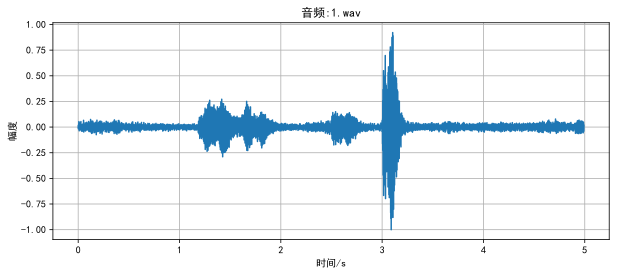

In [6]:

# 读取 WAV 文件
sample_rate, data = wavfile.read("01.wav")
# 获取信号的时长（秒）
duration = len(data) / sample_rate
# 创建时间轴（横轴）数据
time_axis = np.arange(data.shape[0]) / sample_rate
# 归一化音频数据
normalized_data = data / np.max(np.abs(data),axis=0)
# 绘制图形
plt.figure(figsize=(10, 4))
plt.plot(time_axis, normalized_data)
plt.xlabel("时间/s")
plt.ylabel("幅度")
plt.title("音频:1.wav")
plt.grid(True)
plt.show()
